In [592]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime
import pandas as pd
import matplotlib.dates

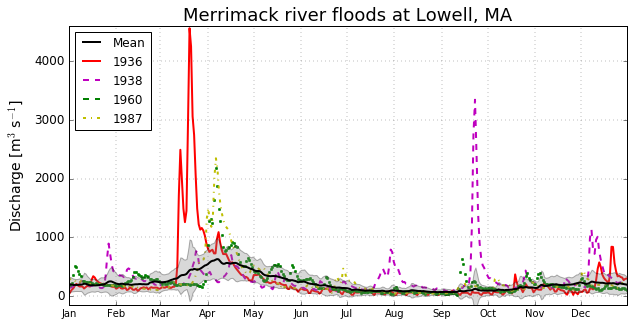

In [593]:
f = open('./data/merrimack_discharge.dat','r')
f.seek(0)

dates_list = []
discharge = []
f2m = 0.3048**3 #feet3 to meter3
for line in f.readlines():
    data = line.split('\t')
    if data[0] == 'USGS':
        i_date = data[2].split('-')
        year = int(i_date[0])
        month = int(i_date[1])
        day = int(i_date[2])
        dates_list.append(datetime(year, month, day))
        discharge.append(float(data[3])*f2m)

ts = pd.Series(discharge,index=dates_list)

statTimeSeries = []
days_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
yearStart = ts.index[0].year
yearEnd = ts.index[-1].year
mean_discharge = []
stdv_discharge = []
for m, days in enumerate(days_list):
    for d in range(days):
        temp = [ts[datetime(y, m+1, d+1)] for y in range(yearStart,yearEnd+1) if datetime(y,m+1,d+1) in ts.index]
        mean_discharge.append(np.mean(temp))
        stdv_discharge.append(np.std(temp, axis=0))

#leap year
temp = [ts[datetime(y, 2, 29)] for y in range(yearStart,yearEnd+1) if y%4 == 0 and y%100 != 0 or y%400 == 0]
mean_discharge.insert(59,np.mean(temp))
stdv_discharge.insert(59,np.std(temp))

df1 = ts['1/1/1936':'12/31/1936']
df2 = ts['1/1/1938':'12/31/1938']
df3 = ts['1/1/1960':'12/31/1960']
df4 = ts['1/1/1987':'12/31/1987']

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.plot(df1, 'r-', linewidth=2, ms=5)
ax2 = ax1.twiny()
ax2.plot(df2, 'm--', linewidth=2, ms=5)
ax3 = ax1.twiny()
ax3.plot(df3, 'g.', linewidth=2, ms=5)
ax4 = ax1.twiny()
ax4.plot(df4, 'y-.', linewidth=2, ms=5)
#mean value
ax5 = ax1.twiny()
ax5.plot(df1.index, mean_discharge, 'k', linewidth=2, ms=5)
#standard deviation
ax5.fill_between(df1.index, np.array(mean_discharge)+np.array(stdv_discharge),
                 np.array(mean_discharge)-np.array(stdv_discharge), facecolor='gray', alpha=0.3)
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])
ax5.set_xticks([])

ax1.set_yticks([0,1000,2000,3000,4000])
ax1.set_yticklabels(['0','1000','2000','3000','4000'],fontsize=12)

ax1.set_title('Merrimack river floods at Lowell, MA',fontsize=18)
ax1.set_ylim(-150,4600)

ax1.grid(True, color='k', linestyle=':', linewidth=0.25)

#ax.set_xlabel('Times')
ax1.set_ylabel(r'Discharge [m$^3$ s$^{-1}$]',fontsize=14)

# Format the dates
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))

#legend: ...
import matplotlib.lines as mlines
line0 = mlines.Line2D([], [], color='k',linestyle='-',linewidth=2,
                          label='Mean')
line1 = mlines.Line2D([], [], color='r',linestyle='-',linewidth=2,
                          label='1936')
line2 = mlines.Line2D([], [], color='m',linestyle='--',linewidth=2,
                          label='1938')
line3 = mlines.Line2D([], [], color='g',linestyle='--',linewidth=2,
                          label='1960')
line4 = mlines.Line2D([], [], color='y',linestyle='-.',linewidth=2,
                          label='1987')
plt.legend(handles=[line0,line1,line2,line3,line4],loc=2,fontsize=12)

Q1. Basic Line Plotting

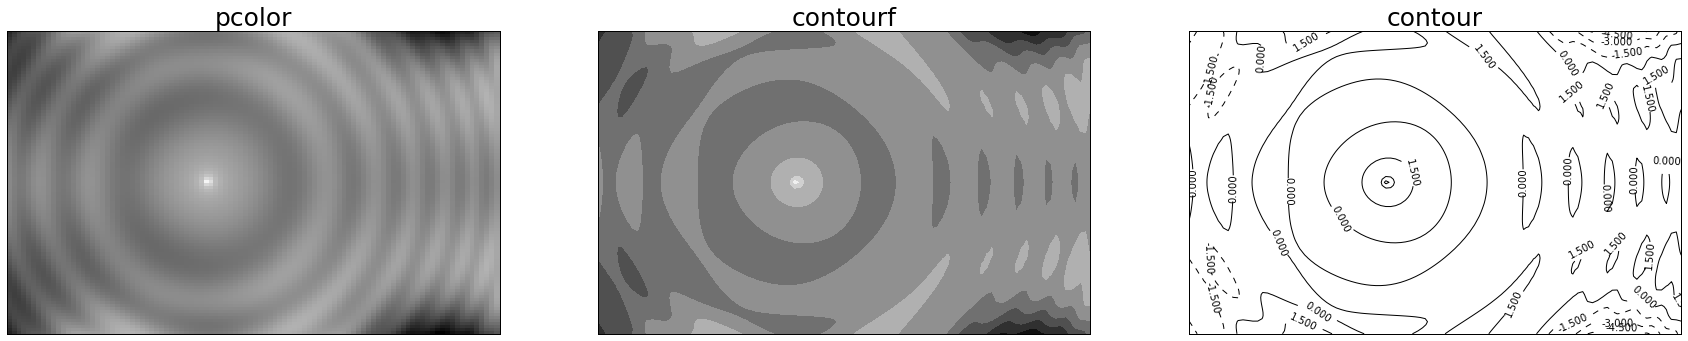

In [594]:
import matplotlib.pyplot as plt
import numpy as np

X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

    
extent = (-4.2, 6.2, -3.2, 3.2)
    
z_min, z_max = -np.abs(Z).max(), np.abs(Z).max()

plt.figure(figsize=(30,10))
plt.subplot(1, 3, 1,aspect='equal')
plt.xticks([])
plt.yticks([])
plt.pcolor(X, Y, Z, cmap='gray', vmin=z_min, vmax=z_max)
plt.title('pcolor',fontsize=25)

plt.subplot(1, 3, 2,aspect='equal')
plt.xticks([])
plt.yticks([])
plt.contourf(Z, hold='on', cmap='gray', extent=extent)
plt.title('contourf',fontsize=25)

plt.subplot(1, 3, 3,aspect='equal')
plt.xticks([])
plt.yticks([])
cs=plt.contour(Z, hold='on', colors='k', extent=extent)
plt.clabel(cs,inline=1,inline_spacing=10,colors='k')
plt.title('contour',fontsize=25)


Q2.Plot 2D function multiple ways

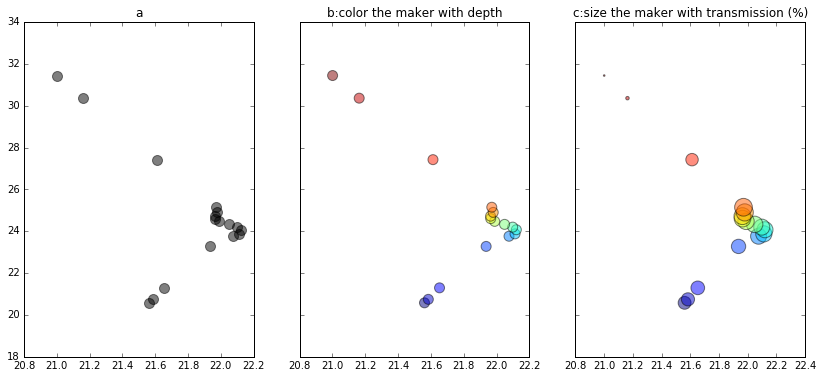

In [595]:
import glob
class dataclass:
    def __init__(self,filename):
        self.name = filename
        temp = []
        salt = []
        dep = []
        tran = []
        with open(self.name) as f:
            for line in f:
                #print(line.split())
                spline = line.split()
                if '*END*' in spline:
                    break
            for line in f:
                spline = line.split()
                dep.append(float(spline[1]))
                temp.append(float(spline[2]))
                salt.append(float(spline[5]))
                tran.append(float(spline[9]))
        self.depth = dep
        self.temperature = temp
        self.salinity = salt
        self.transmission = tran
    def salt_mean(self):
        return np.mean(self.salinity)
    def temp_max(self):
        return np.max(self.temperature)

def show():

    file_list = glob.glob('./MCH/m1001a.cnv2')
    wind = []
    for file in file_list:
        wind.append(dataclass(file))
    #show wind salt_mean() temp_max()
    for w in wind:
        x = w.temperature
        y = w.salinity
        colors = w.depth/np.max(w.depth)
        area = 100*np.pi * (15*w.transmission/np.max(w.transmission))**2  # 0 to 15 point radiuses
        fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14,6))
        axes[0].scatter(x, y, s=100, c='black', alpha=0.5)
        axes[0].set_title('a')
        axes[1].scatter(x, y, s=100, c=colors, alpha=0.5)
        axes[1].set_title('b:color the maker with depth')
        axes[2].scatter(x, y, s=area, c=colors, alpha=0.5)
        axes[2].set_title('c:size the maker with transmission (%)')
show()



Q3. Read 2D data and make scatter plot

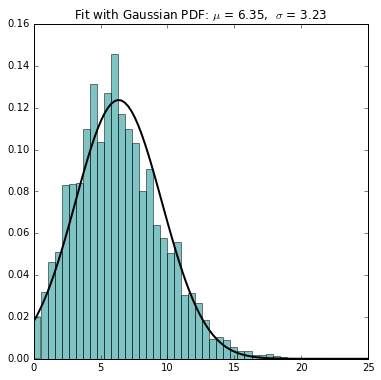

In [657]:
burl = np.genfromtxt('./view_text_file.txt')
wind_speed = burl[:, 6]

from scipy import stats
from scipy.stats import norm


# Generate some data for this demonstration.
data = wind_speed
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# Plot the histogram.
ax.hist(data, bins=40, normed=True, alpha=0.5, color='darkcyan')
# Plot the PDF.
# Fit a normal distribution to the data:
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)
title = "Fit with Gaussian PDF: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std)
plt.title(title)


Q4. Histogram

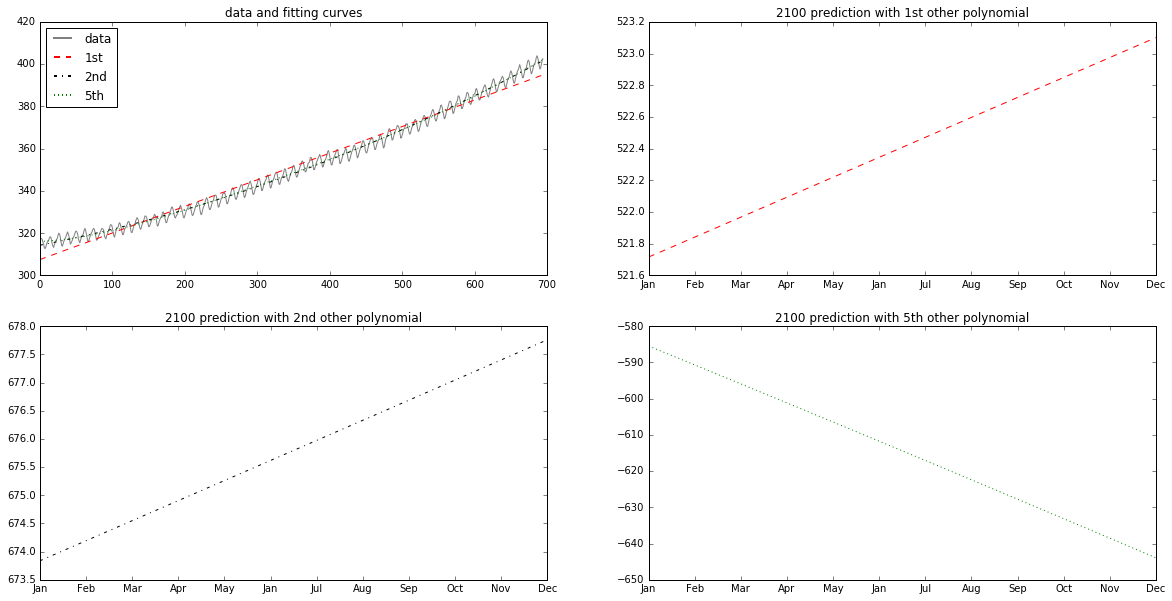

In [597]:
import scipy.optimize as optimization
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]

def func1(x, a, b):
    return a + b*x

def func2(x, a, b, c):
    return a + b*x + c*x*x

def func5(x, a, b, c, d, e, f):
    return a + b*x + c*x*x + d*x**3 + e*x**4 + f*x**5


ts_co2=pd.Series(np.array(co2),pd.period_range(str(int(years[0]))+'-'
                                            + str(int(months[0])) +'-'+ '1', periods=len(years), freq='M'))

para1=np.array([0.0, 0.0])
x = [int(years[i] - years[0])*12 + int(months[i] - months[0]) for i in range(len(years))]
beta1, stdv1 = optimization.curve_fit(func1, x, co2, para1)

para2=np.array([0.0, 0.0,0.0])
beta2, stdv2 = optimization.curve_fit(func2, x, co2, para2)

para5=np.array([0.0, 0.0,0.0, 0.0, 0.0, 0.0])
beta5, stdv5 = optimization.curve_fit(func5, x, co2, para5)

x1 = np.array(x)

y1 =beta1[0] + beta1[1]*x1
y2 =beta2[0] + beta2[1]*x1 + beta2[2]*x1**2
y5 =beta5[0] + beta5[1]*x1 + beta5[2]*x1**2 + beta5[3]*x1**3 + beta5[4]*x1**4 + beta5[5]*x1**5

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)

test=pd.Series(co2[:100],pd.period_range('3/1/1978', periods=100, freq='M'))

ax1.plot(x,co2,'gray',x1,y1,'r--',x1,y2,'k-.',x1, y5,'g:')
# Format the dates
#ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax1.set_title('data and fitting curves')
line0 = mlines.Line2D([], [], color='gray',linestyle='-',linewidth=2,
                          label='data')
line1 = mlines.Line2D([], [], color='r',linestyle='--',linewidth=2,
                          label='1st')
line2 = mlines.Line2D([], [], color='k',linestyle='-.',linewidth=2,
                          label='2nd')
line3 = mlines.Line2D([], [], color='g',linestyle=':',linewidth=2,
                          label='5th')
plt.legend(handles=[line0,line1,line2,line3],loc=2,fontsize=12)


predictor =[(2100-int(years[0]))*12 + (m - int(months[0])) for m in range(1,13)]
response1 = func1(np.array(predictor),beta1[0],beta1[1]) 
response2 = func2(np.array(predictor),beta2[0],beta2[1],beta2[2]) 
response5 = func5(np.array(predictor),beta5[0],beta5[1],beta5[2],beta5[3],beta5[4],beta5[5]) 

ax2 = fig.add_subplot(2,2,2)
p=pd.period_range('1/1/2100', periods=12, freq='M')
plt.xticks(range(1560,1572))
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jan','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2.plot(pd.Series(response1,p),'r--')
ax2.set_title('2100 prediction with 1st other polynomial')

ax3 = fig.add_subplot(2,2,3)
plt.xticks(range(1560,1572))
ax3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jan','Jul','Aug','Sep','Oct','Nov','Dec'])
ax3.plot(pd.Series(response2,p),'k-.')
ax3.set_title('2100 prediction with 2nd other polynomial')

ax4 = fig.add_subplot(2,2,4)
plt.xticks(range(1560,1572))
ax4.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jan','Jul','Aug','Sep','Oct','Nov','Dec'])
ax4.plot(pd.Series(response5,p),'g:')
ax4.set_title('2100 prediction with 5th other polynomial')
#ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%M'))

I think the linear prediction is more reliable. Since the 5th order fitting gives negative values, which means overfitting. And 2nd order prediction seems too high for co2.

Q5. (Grad) Fit and line and plot

frame_000.png
frame_001.png
frame_002.png
frame_003.png
frame_004.png
frame_005.png
frame_006.png
frame_007.png
frame_008.png
frame_009.png
frame_010.png
frame_011.png
frame_012.png
frame_013.png
frame_014.png
frame_015.png
frame_016.png
frame_017.png
frame_018.png
frame_019.png
frame_020.png
frame_021.png
frame_022.png
frame_023.png
frame_024.png
frame_025.png
frame_026.png
frame_027.png
frame_028.png
frame_029.png
frame_030.png
frame_031.png
frame_032.png
frame_033.png
frame_034.png
frame_035.png
frame_036.png
frame_037.png
frame_038.png
frame_039.png
frame_040.png
frame_041.png
frame_042.png
frame_043.png
frame_044.png
frame_045.png
frame_046.png
frame_047.png
frame_048.png
frame_049.png
frame_050.png
frame_051.png
frame_052.png
frame_053.png
frame_054.png
frame_055.png
frame_056.png
frame_057.png
frame_058.png
frame_059.png
frame_060.png
frame_061.png
frame_062.png
frame_063.png
frame_064.png
frame_065.png
frame_066.png
frame_067.png
frame_068.png
frame_069.png
frame_070.png
frame_

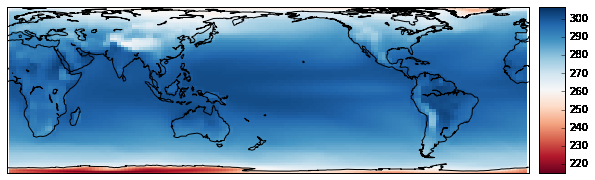

In [656]:
lon, lat, mean_surf_temp = np.load('./data/surface_temp_predictions.npz', encoding='latin1')['arr_0']
#A trap here encoding system :D

from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(10,5))
m = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
# compute map projection coordinates for lat/lon grid.
x, y = m(*np.meshgrid(lon,lat))
z_min, z_max = np.min(mean_surf_temp), np.max(mean_surf_temp)
for i in range(100):
    frame_name = 'frame_%03d' % i + '.png'
    print(frame_name)
    mappable = m.pcolor(x,y,mean_surf_temp[i],cmap='RdBu', vmin=z_min, vmax=z_max)
    m.colorbar(mappable)
    fig.savefig(frame_name)
#ffmpeg -y -r 10 -i frame_%03d.png -c:v libx264 -pix_fmt yuv420p -crf 15 OUTFILE.mp4

Q6. (Grad) Make a movie